
---

FOR I IN RANGE (10)
MAX_DEPTH

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

df = pd.read_csv('tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [169]:
df = pd.get_dummies(df, columns=['sex',	'smoker',	'day',	'time'])

In [170]:
df = df.replace({True: 1, False: 0})
df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


In [171]:
df['tip_pct'] = df['tip'] / df['total_bill']
df


,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,tip_pct
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0,0.059447
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0,0.160542
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0,0.166587
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0,0.139780
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0,0.146808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0,0.203927
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0,0.073584
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0,0.088222
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0,0.098204


In [172]:
df['median_tip_pct'] = df['tip_pct'].median()
df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,tip_pct,median_tip_pct
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0,0.059447,0.15477
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0,0.160542,0.15477
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0,0.166587,0.15477
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0,0.139780,0.15477
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0,0.146808,0.15477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0,0.203927,0.15477
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0,0.073584,0.15477
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0,0.088222,0.15477
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0,0.098204,0.15477


In [173]:
df['tip_class'] = df['tip_pct'].apply(lambda x: 1 if x > df['median_tip_pct'].iloc[0] else 0)
df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch,tip_pct,median_tip_pct,tip_class
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0,0.059447,0.15477,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0,0.160542,0.15477,1
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0,0.166587,0.15477,1
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0,0.139780,0.15477,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0,0.146808,0.15477,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0,0.203927,0.15477,1
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0,0.073584,0.15477,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0,0.088222,0.15477,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0,0.098204,0.15477,0


In [174]:
features = df.drop(['tip', 'tip_pct', 'median_tip_pct', 'tip_class'], axis=1)
target = df['tip_class']

In [175]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5,  random_state=42)

In [176]:
regressor = DecisionTreeClassifier()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

# Accurary: é o número de previsões corretas dividido pelo total de previsões
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4672131147540984


In [177]:
feature_names = x_train.columns

dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_names,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('image.png')
#Image(graph.create_png())

True

In [178]:
regressor = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=1, max_depth=10)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

# Accurary: é o número de previsões corretas dividido pelo total de previsões
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5409836065573771


Accuracy with max_depth=1: 0.5573770491803278
Accuracy with max_depth=2: 0.5655737704918032
Accuracy with max_depth=3: 0.5409836065573771
Accuracy with max_depth=4: 0.5409836065573771
Accuracy with max_depth=5: 0.4918032786885246
Accuracy with max_depth=6: 0.4918032786885246
Accuracy with max_depth=7: 0.47540983606557374
Accuracy with max_depth=8: 0.5327868852459017
Accuracy with max_depth=9: 0.5409836065573771
Accuracy with max_depth=10: 0.5081967213114754


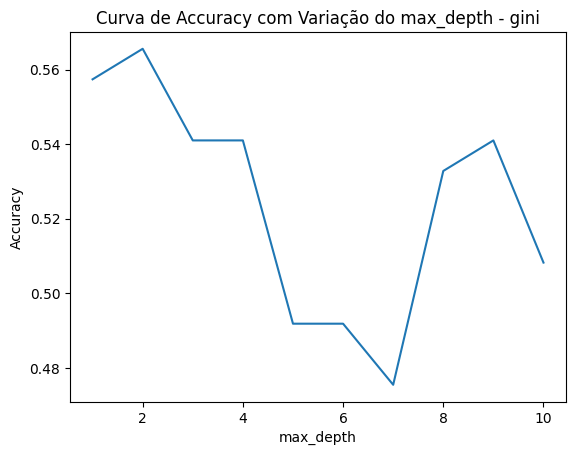

In [179]:
accuracy_scores = []
for i in range(1, 11):
  regressor = DecisionTreeClassifier(criterion='gini', min_samples_leaf=1, max_depth=i, random_state=42) # adicionando random_state
  regressor.fit(x_train, y_train)
  y_pred = regressor.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)
  print(f"Accuracy with max_depth={i}: {accuracy}")

# Plotando a curva de accuracy
import matplotlib.pyplot as plt
plt.plot(range(1, 11), accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Curva de Accuracy com Variação do max_depth - gini')
plt.show()


Accuracy with max_depth=1: 0.5573770491803278
Accuracy with max_depth=2: 0.5655737704918032
Accuracy with max_depth=3: 0.5409836065573771
Accuracy with max_depth=4: 0.5409836065573771
Accuracy with max_depth=5: 0.4918032786885246
Accuracy with max_depth=6: 0.48360655737704916
Accuracy with max_depth=7: 0.5245901639344263
Accuracy with max_depth=8: 0.5409836065573771
Accuracy with max_depth=9: 0.5
Accuracy with max_depth=10: 0.5


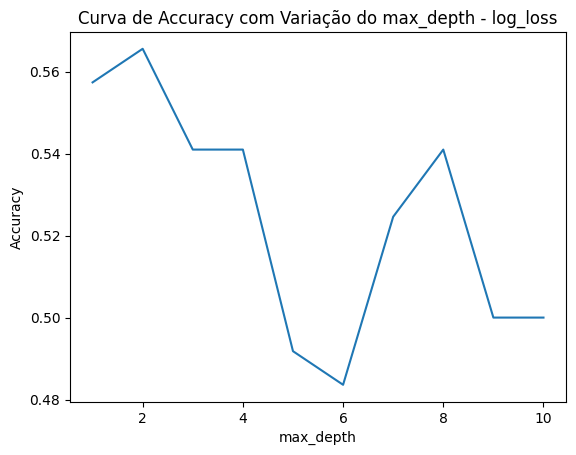

In [180]:
accuracy_scores = []
for i in range(1, 11):
  regressor = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=1, max_depth=i, random_state=42) # adicionando random_state
  regressor.fit(x_train, y_train)
  y_pred = regressor.predict(x_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)
  print(f"Accuracy with max_depth={i}: {accuracy}")

# Plotando a curva de accuracy
import matplotlib.pyplot as plt
plt.plot(range(1, 11), accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Curva de Accuracy com Variação do max_depth - log_loss')
plt.show()

Accuracy with n_estimators=10, criterion=gini: 0.5491803278688525
Accuracy with n_estimators=10, criterion=log_loss: 0.5655737704918032
Accuracy with n_estimators=100, criterion=gini: 0.5245901639344263
Accuracy with n_estimators=100, criterion=log_loss: 0.5163934426229508
Accuracy with n_estimators=1000, criterion=gini: 0.5409836065573771
Accuracy with n_estimators=1000, criterion=log_loss: 0.5409836065573771


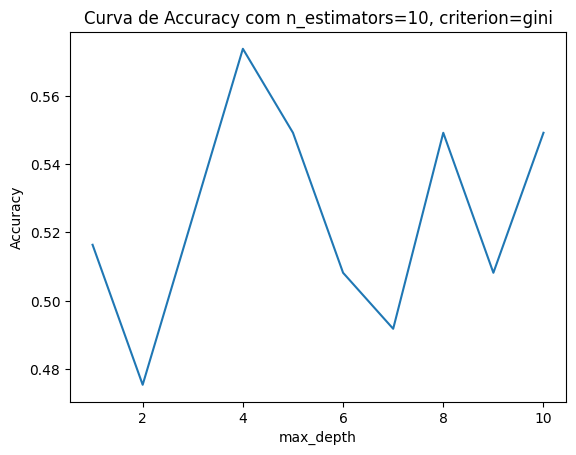

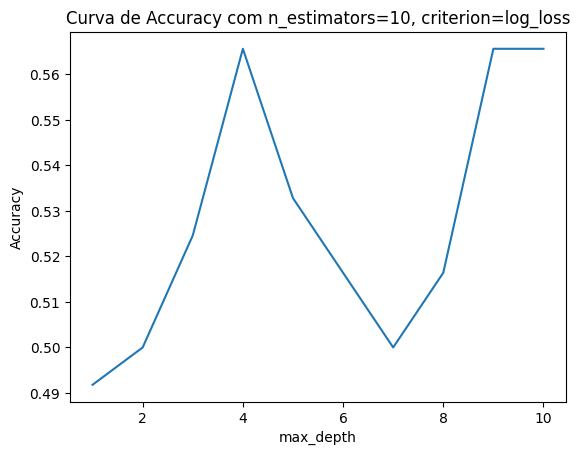

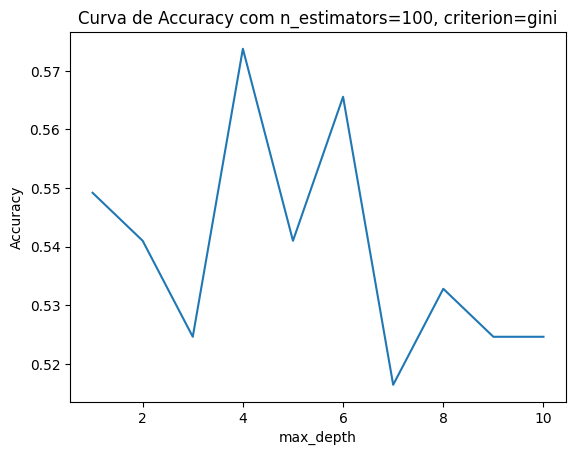

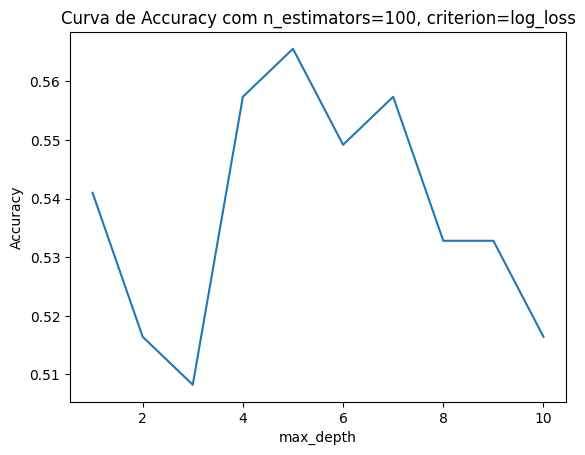

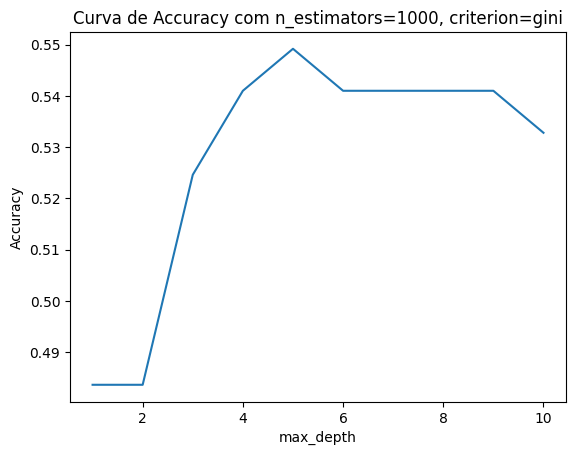

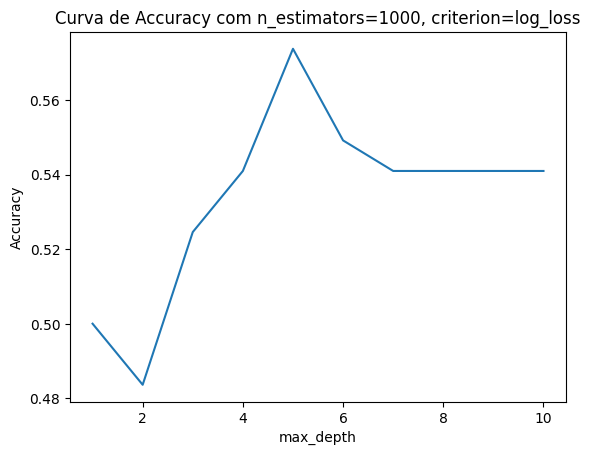

In [189]:
for n_estimators in [10, 100, 1000]:
  for criterion in ['gini', 'log_loss']:

    clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, random_state=42)

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy with n_estimators={n_estimators}, criterion={criterion}: {accuracy}")

for n_estimators in [10, 100, 1000]:
  for criterion in ['gini', 'log_loss']:
    accuracy_scores = []
    for max_depth in range(1, 11):
      clf = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, random_state=42)
      clf.fit(x_train, y_train)
      y_pred = clf.predict(x_test)
      accuracy = metrics.accuracy_score(y_test, y_pred)
      accuracy_scores.append(accuracy)

    plt.plot(range(1, 11), accuracy_scores)
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.title(f'Curva de Accuracy com n_estimators={n_estimators}, criterion={criterion}')
    plt.show()


**Qual algoritmo e com quais hiperparâmetros tiveram a melhor performance?**


De acordo com os resultados obtidos no notebook, o algoritmo que apresentou a melhor performance foi o RandomForestClassifier com os seguintes hiperparâmetros:

n_estimators = 100

criterion = 'gini'

max_depth = 4

Essa configuração resultou em uma acurácia de aproximadamente 0.57, a mais alta dentre todas as combinações testadas.